# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor

In [2]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [3]:
# we can simulate the robot but we need to provide a controller of the following form
def dummy_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    # here we do nothing and just return some non-zero control
    #return 1. * np.ones([2,])
    
    u_star = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2]).T
    
    return u_star



# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


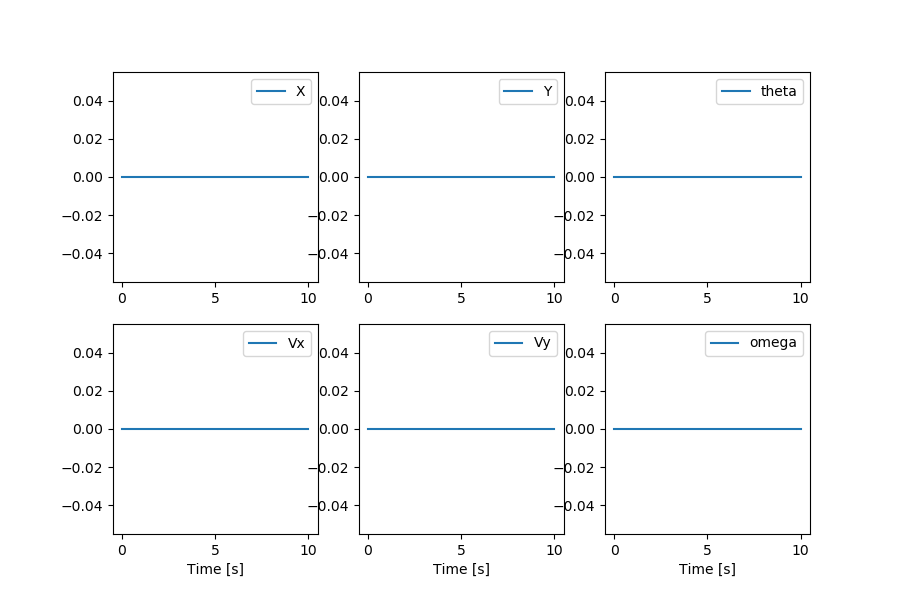

<IPython.core.display.Javascript object>


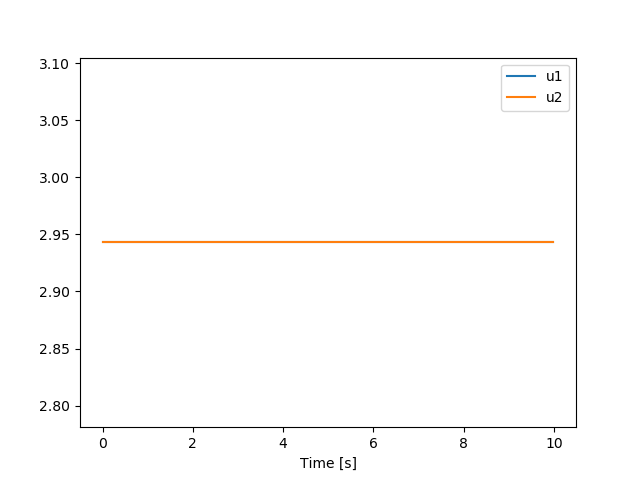

In [4]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('1.1.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('1.2.png')

In [5]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAjwm1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATEWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqF/fg3H3RwnGywElOWnD/iUbYrVlOD93wcAAB1j
mojtX48gAAJK32dUCZsNACxV8htVJ9HRICyDX1d9mKu02gUV00ECgRM+eUw3cCBd1L6ITIDwblCZ
pA3Dm7zFXHXV8XonxFbA7FPTZ/zFA/UdThP2zpDRiQY+H/Z1pmwgsqY2oz81qPKnhvqx9KpW8hqu
+/vWQHKBgXqQNGrPHols8i5PN/sFRw5SXv4gI/wcAUUpFFOzE30LCrEV8Sl0oPYhPlkkwnMjP2G5
x7w74P7AXEP1TFMz61IvYuV8o5lVRjxQi7RQg7rkI3IYAwDs6/7F3EA+kgy6GD1MvuRxU2fJsBFR
V/GWbtE8ZgF/HnW57IQTudBXWaDRScPsBnlg4+dM3gCmHy8JmIT/KL0h5/R+gespzc4W29ELH7WW
QqmetrW3bpditpsP2Nms3hXO6HHfAKpLFmYNjlA/fn+a284hre3ZjmN6fEbrVDQUbcyk+KOf6GsA
TmTgU+NHTXhKvdI/iLu0SJmLC7d9mr2kmMg6jbk0SkNEmntubDlG0sq79h5+pYPv1kImcncsZT2T
x8obB6F1JgFmpyPWMFb1bz7Ag+vngeSRDV6625X6QHNeuX91GQyfbpJFD+y+lhDcbI7+zzXEJump
Os9mtZnz3zJvzztARahFeh3aY2J0Ljjg6t0uPmpPkNt5oGzBenyN7VWT3KEY5IJPyI0PuOwAQAQZ
qMTbxEOjWUOWuRI6cVmq3X/Og9AJ5RU2jbSc+aeRu+cvrfPqfMZdquVC6isOmFrNmQ3NxaAmoynd
LW6uDEv2tgD7TV8AGEnrwTbhCylaCJtT7VfEbDEqiAjw26YJS2fzaDNWAATwRSsz8dxhdEz30tkv
fWDVCx2JX4tZpGe972rzKUOQAqtIX90Sy4DYNFQbHHDhMr0E+J9GGisezAwOwJRv1UWTr8iJ3mie
U7Gt4zJBiefY/XmsOEKvOTsVe11/7uK1qd2yzvksafyGCimdpVGlGFEW2S8HelDTg2nT5cwpaF6h
ei02jTL8IMjLGIoGHQurR

In [6]:
# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = True)

<IPython.core.display.Javascript object>


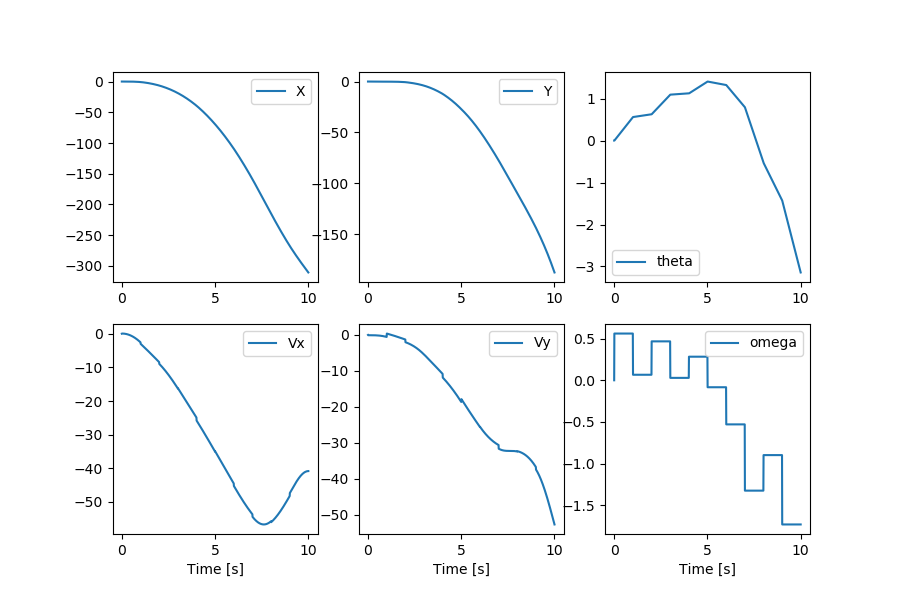

<IPython.core.display.Javascript object>


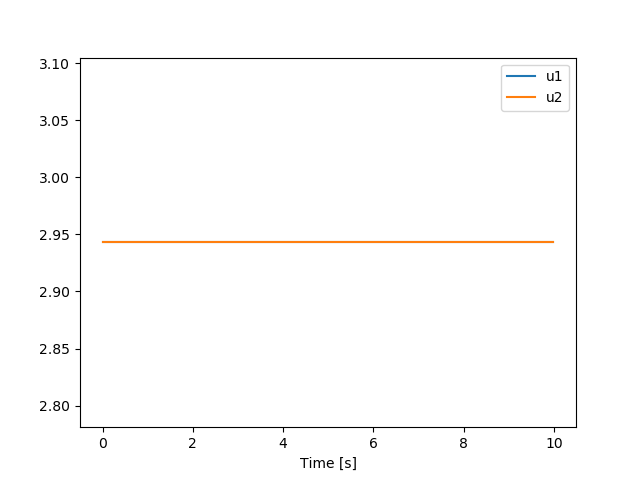

In [7]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('1.3.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('1.4.png')

In [8]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA4km1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASJWWI
hAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADAAYjEjf+h/F4zfwAAAMAALcA
GFAMIAqoDCop7v4n7qcQC2GTfPg0RWyJcNZnZIg+ms2iWsBb1ygUhAZBCiCTW6wKSTuAotxSMtmu
F6Ne0JRw9SOVthzL7K70lZCO9aS6cBU914O/IX20vFWMimi1psUwlNWhufuw0v9mYgT7Ser7mL/9
3+1bzHmP9ZZSbcPW2Hfgtv+WpGielLqPJWaGZ50R9TBoBBjQ014j03+vw7tYq/V3+AJ1oCXcaLzW
jfPbLXS1FZwgrSOMoFVS5OFn5CwcvSO64pixh6vHCq0OXEIN4i12uUsh7rwNZe/Ao7INgcRJxFhT
wEJVtgb4JQv0t8G8AUt0wqzHxoUvSAdhxnWhP62FWa6UKhPzVpR1cC81bElV4WjIcMipSB2FwsyO
e4UmOl5OQCbKvJC9y9LhXhO/AAfCYQJf174lD3/Rn5YB4ZOxKJm0WCyAGWBRAFukIiPR5HcOvFrk
8R7HcsMP5cCD00OzFbxxx7aX8VHTYhVMlpmalle1ZDl/cE/wC3LWS/fxx66VCxWF0mN7qDSXQGPp
eaNgEtLmna2FcGi8IOTnq1zBbSlcCafl9/aFdeYjka9zSsNpT2FkjcXMM2LXdM1iaRIN/VIrOeib
MPA70bG1y+Yiup9975Bcd6CIZ8zrde1PsoH9Ax7FV0SsM+DJoqQZ/xX42q837Jjz+eyN/YQXHabz
JjgDbSH+fO/GPQkYwt4eLvCvix/s8Gs+Y7jJp7n8qNI0SGJrOdTnfxR2n9U1JX7eDFi4P2dkCtO2
o++3jIvPf2sX0Sg8Au1FYQ3h3f2hq8aJj257PsoUc6K3BLJqRv48jfClvmGixocpFmwifOT0J9/s
9yEXN4sivt6AhKiYEL1V7b9ezHKeaZ3UQ1MAAAMAAAMAAAMAAAT+G2WUArTgkXbxtAI6eDOlC41Q
rK3gPkHDA6Tkh7/DwxsYaj7i6Zz/tc3jE+AhNf+/w/jFcrRyc+rxrfqgBH8k0Qzj5MFqlfjGP5v3
AH5XyXBPc7ajnohIZjHeGJCIUL0j1tQCH7/g6WI5Y3wvoLv9V1mHoNjhC9o8CUIVNEb3dUZB2ElF
A/+dZRoFP6r03BLXGRU4Q7lUTeP/mZgeDcwDsRGGa8Ci9AiFAg7ZZDRlgpCZ9CfxzpQyPAmzdoX3
h2m6GA2/TmnyJkU3hsJXiyDhZld9pNJDU80AvtMSQDVEEkBtHJVvf/yKxAGkhPmiIOuJdkox/1I6
Z/ntebMpUSAfJ3IYBiLA04C7ZANsMLaGYwAx5/lTZPvy77JxLVI0oUmMypkPTUcgQvwDWAAAAwAA
AwAAAwAAAwDINsc9M67lQ5RchbcN6cnpCg+HyaQQUQzEYuMw5YywFBoseTShU/1XKUPUaAInCbOk
5vy7B1Uu/xmUMvetp6Pa7J9D6MrQXvWqn6BtL48Ght+eNPMM2OWKtdFcSoJPTYKBfRZZS5kZOUM4
tynlceA+TGETG2CptdAILZJvQjTi2A+CtqX61eWO63QlDs3XGvI+8zk2nunAuOBcNOQhQHWCDipq
oFfDuNuTiRW5wM3C7W6mK4TlUDRjJGkxNL0wucseyx8CfZT94cZxoZV+4DJ2Mqrt1IQJT4370zNP
zyTgox1yR5J4ivv3cNp8ZWV0H7ZZvnZQHPfY/1rXNkDVwinF8VshmPRoj2PAxGAF/gBCutRRC2qx
+fDc31MJI0AGFZ4YOz/JMQ0yMpMaJlb4rfled/0O2QnDuMohghIIDHo/m2gQhfM4JW2ownSS8nu+
dtgoezf2o3TwoA9MG2MG7EWXvwt83ASz1CiubwT29H+sWo2hAdBJPYAAAAMAAAMAAkvJbI2SkWNz
3ZZF8GMudmpWzjalwjgYusr8H6XVGtSFsRExyEtCj6wel0jytAJCnnRRgqgSm5iKqv+orOc0yquM
d+QzrV5x8ipCaOJUVBCz2AF4Ym6Qa/vFmC/+V5lJDWajaP45mzmnuUSVZdvf67RltFdtg7KKasZt
HOof7OUIEx1Ouh2T2HB5L0RtGK0LUu6EtVaFJqTro+hAxCIZio82VhhW/viP6ga/S7l9qmQRT+Qf
tNYkqpNgIqKv4y08FFs2GE1DsUZYisrS60OGcLdEzvCX4YvIt+Gjr/tPsysFu7dkBUv6R/hupCTc
ZNbvP4WpULJn6TLwwb79hRpS1IXOwR7fPv6vYp47b4shSeF5y2x4T+aOvrmKolkMrEQYRysou380
XV0x8QUcYVrRa+GDafOZ8bxtR8UrWgD/di7XHtbywyUwFmVdyz86yeVSULr2V0Vm+DOOX7EI8bB1
Q3VfuVqvZ555OtVVxL/7wYAlJjscz5O+lVs14N7psGRhoboB/5VHrhwr9/bT3gErBoY/z3Lnl1sz
0u1w16ReeQDYtGtWc/6ubWBu7Vy6B2YVmtjQN06MQhnell+5r0uAdbEJb8+a6IfzJU1OoKRY2BAC
lxcDanKXvjxYxIK6T8xLXhtdnwHEos9e7OfbWsMRRzrJ0xppNI/3fg+3yQ1+gDeAm0lkeH58v/CB
sU/fOycTWutGEctGBj9gMpEbckgcfX5ETusOFzd+NoKvTgfV9eyoVhzNCTZWdf5Lf/aHIvjHKAUX
hVsSZsipJNznO2/upuIgzIy4ACAZ2iN5JDdm7mWX4Nk3Q1b+lXPw+jIOduGKBHhe5rT96tob0dbE
cvAI+sDGKwL1EIBBkzvxrwV5gto27jUG912eHAAB/QcqmYAAAqGum6z37ubCR21oZKHRbAxSTHyZ
LIaQG9vMWHIYiB7DPl705SNNvaB+guJxu2VGeGgOiZqwYLst1Jc3MWLa2Gxq2rzTrFfZuL1lP7fQ
APWMp5dP3+9lGoSA1isMB

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

In [9]:
def get_linearization(z, u):
    
    A = np.array([[1,quadrotor.DELTA_T,0,0,0,0],
                  [0,1,0,0,-(1/quadrotor.MASS)*(u[0]+u[1])*np.cos(z[4])*quadrotor.DELTA_T,0],
                  [0,0,1,quadrotor.DELTA_T,0,0],
                  [0,0,0,1,-(1/quadrotor.MASS)*(u[0]+u[1])*np.sin(z[4])*quadrotor.DELTA_T,0],
                  [0,0,0,0,1,quadrotor.DELTA_T],
                  [0,0,0,0,0,1]])
    
    B = np.array([[0,0],
                  [-np.sin(z[4])*quadrotor.DELTA_T/quadrotor.MASS,-np.sin(z[4])*quadrotor.DELTA_T/quadrotor.MASS],
                  [0,0],
                  [np.cos(z[4])*quadrotor.DELTA_T/quadrotor.MASS,np.cos(z[4])*quadrotor.DELTA_T/quadrotor.MASS],
                  [0,0],
                  [quadrotor.LENGTH*quadrotor.DELTA_T/quadrotor.INERTIA,-quadrotor.LENGTH*quadrotor.DELTA_T/quadrotor.INERTIA]])
    
    return A,B
    

In [10]:
def solve_LQR(A, B, Q, R, QN, N):
    
    list_of_P = []
    list_of_K = []

    list_of_P.append(QN)

    for i in range(N):
        list_of_K.append(-np.matmul(np.linalg.inv(np.matmul(B.T, np.matmul(list_of_P[i],B))+R),np.matmul(B.T, np.matmul(list_of_P[i],A))))
        list_of_P.append(Q + np.matmul(A.T,np.matmul(list_of_P[i],A))+np.matmul(A.T,np.matmul(list_of_P[i],np.matmul(B,list_of_K[i]))))
        
 
    list_of_P.reverse()
    list_of_K.reverse()
    
    return list_of_P, list_of_K

In [11]:
def origin_controller(state,i):
    
    z_star = np.array([0,0,0,0,0,0]).T
    u_star = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2]).T
    
    A, B = get_linearization(z_star, u_star)
    
    Q = np.array([[100.0, 0., 0., 0., 0., 0.], 
                  [0., 10.0, 0., 0., 0., 0.], 
                  [0., 0., 100.0, 0., 0., 0.], 
                  [0., 0., 0., 10.0, 0., 0.], 
                  [0., 0., 0., 0., 100.0, 0.], 
                  [0., 0., 0., 0., 0., 10.0]])
    
    R = np.array([[0.01, 0.],[0., 0.01]])
    
    QN = Q
    
    _, K = solve_LQR(A, B, Q, R, QN, 1000)
    
    
    u = np.matmul(K[i],(state - z_star)) + u_star
    
    return u

    

In [12]:
z_star = np.array([0,0,0,0,0,0]).T
u_star = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2]).T
A, B = get_linearization(z_star, u_star)

Q = np.array([[100.0, 0., 0., 0., 0., 0.], 
              [0., 100.0, 0., 0., 0., 0.], 
              [0., 0., 100.0, 0., 0., 0.], 
              [0., 0., 0., 100.0, 0., 0.], 
              [0., 0., 0., 0., 100.0, 0.], 
              [0., 0., 0., 0., 0., 100.0]])
    
R = np.array([[0.01, 0.],[0., 0.01]])

QN = Q
    
_, K = solve_LQR(A, B, Q, R, QN, 1)

print(np.shape(K))
print(A.shape)
print(B.shape)
print(u_star.shape)
print(z_star.shape)


(1, 2, 6)
(6, 6)
(6, 2)
(2,)
(6,)


In [13]:
# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, origin_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


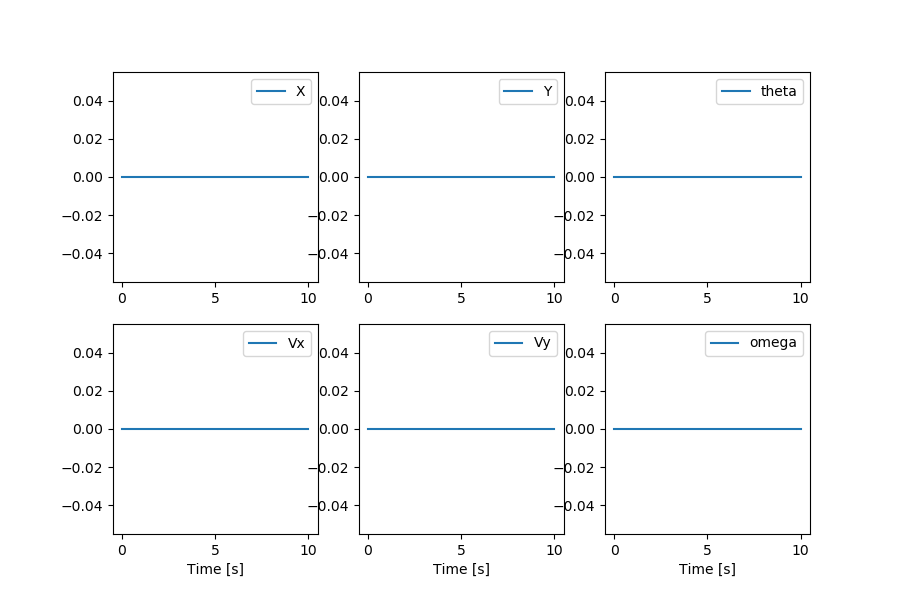

<IPython.core.display.Javascript object>


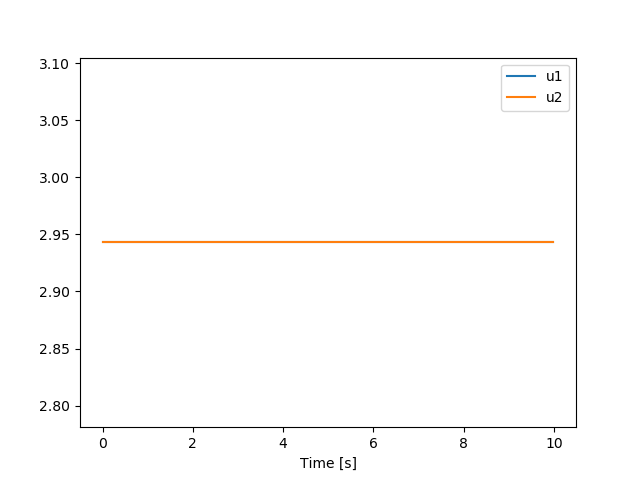

In [14]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('2.1.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('2.2.png')

In [15]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAjwm1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATEWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqF/fg3H3RwnGywElOWnD/iUbYrVlOD93wcAAB1j
mojtX48gAAJK32dUCZsNACxV8htVJ9HRICyDX1d9mKu02gUV00ECgRM+eUw3cCBd1L6ITIDwblCZ
pA3Dm7zFXHXV8XonxFbA7FPTZ/zFA/UdThP2zpDRiQY+H/Z1pmwgsqY2oz81qPKnhvqx9KpW8hqu
+/vWQHKBgXqQNGrPHols8i5PN/sFRw5SXv4gI/wcAUUpFFOzE30LCrEV8Sl0oPYhPlkkwnMjP2G5
x7w74P7AXEP1TFMz61IvYuV8o5lVRjxQi7RQg7rkI3IYAwDs6/7F3EA+kgy6GD1MvuRxU2fJsBFR
V/GWbtE8ZgF/HnW57IQTudBXWaDRScPsBnlg4+dM3gCmHy8JmIT/KL0h5/R+gespzc4W29ELH7WW
QqmetrW3bpditpsP2Nms3hXO6HHfAKpLFmYNjlA/fn+a284hre3ZjmN6fEbrVDQUbcyk+KOf6GsA
TmTgU+NHTXhKvdI/iLu0SJmLC7d9mr2kmMg6jbk0SkNEmntubDlG0sq79h5+pYPv1kImcncsZT2T
x8obB6F1JgFmpyPWMFb1bz7Ag+vngeSRDV6625X6QHNeuX91GQyfbpJFD+y+lhDcbI7+zzXEJump
Os9mtZnz3zJvzztARahFeh3aY2J0Ljjg6t0uPmpPkNt5oGzBenyN7VWT3KEY5IJPyI0PuOwAQAQZ
qMTbxEOjWUOWuRI6cVmq3X/Og9AJ5RU2jbSc+aeRu+cvrfPqfMZdquVC6isOmFrNmQ3NxaAmoynd
LW6uDEv2tgD7TV8AGEnrwTbhCylaCJtT7VfEbDEqiAjw26YJS2fzaDNWAATwRSsz8dxhdEz30tkv
fWDVCx2JX4tZpGe972rzKUOQAqtIX90Sy4DYNFQbHHDhMr0E+J9GGisezAwOwJRv1UWTr8iJ3mie
U7Gt4zJBiefY/XmsOEKvOTsVe11/7uK1qd2yzvksafyGCimdpVGlGFEW2S8HelDTg2nT5cwpaF6h
ei02jTL8IMjLGIoGHQurR

<IPython.core.display.Javascript object>


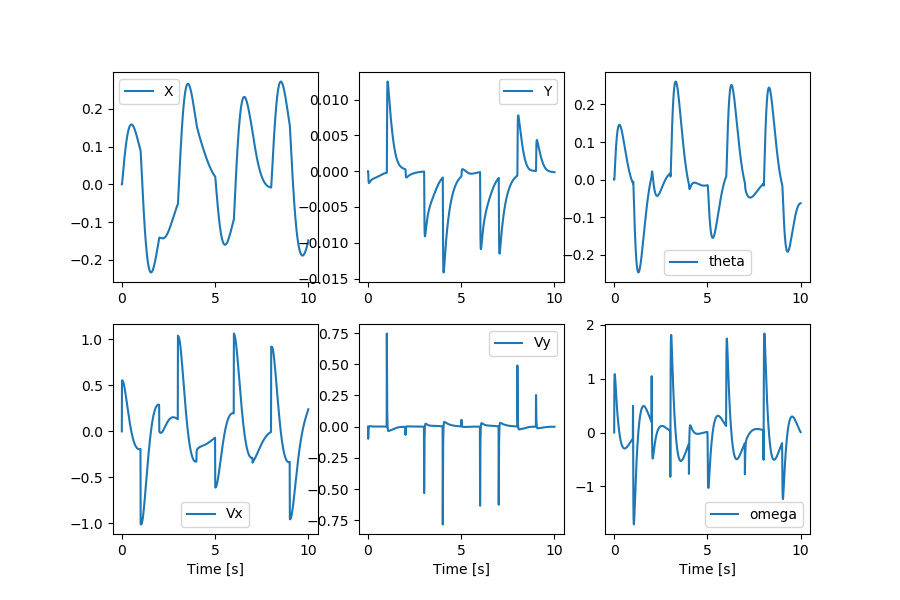

<IPython.core.display.Javascript object>


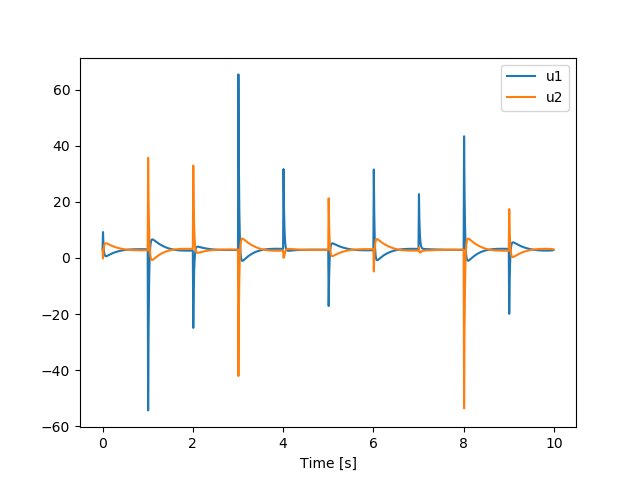

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABxt21kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASqGWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPcjdqbXtPkeEX3xtF7UDBmzGhyN0tv1XB+9IOAAA6xz
+R2r8+QAAElb7hqBM2mgBYq+S1CFfPx2vpma6umjWjy3Hf9xlz7NYaEWiUN7LC73UVvF31D4eImf
ugrv368h0U9IeOVkz/FG358aMKS3iUNFVvmjSkyFrnBjvKrOQg17zG3PTNYalN+4mGOQO6HKtGU4
AENT9DCwwWVYxsdvroFHSvN3gE9z2Wv0tP8FWWelt9lDKKbI6NX2mpAkC9xaFBC5vPOWl5xRDFaG
K9sjbVWhSak66PoRwLRUy36J7RVfIYAwDtML96mtMIoEknDGATvgSfAORoP2pWFdR8fFCZgF/Hyr
l6tbMJGwtGKpTtZ0p6vywdiZVFUB8wBB3qMHk2UsIgtY5+fCaaXQHmXrTIfwc187+ayTxmrMhqr+
xcHv8hyoy+01klKvzazu4fePuCPMQ1g0BKXiu1twFMfw5Or7vyuJRcMBp856IpEyPMdRlLVKhHjx
fn4bGUL752Aj+d5nar+4Hrt4rDxfmbWIhdA8iUd26LGsL8Q7IxQolXU8gwd9JWkPiJJrY0zYzLYi
E0XJHF3eCIi8hI3rxNXw8spVqCRQQPqtXfrSwTFhQh8+DSXrxp5TyYBMoGWC2SHTVNAgWyHXEen6
KSPO6mZuLjkwcAdh/10WVyN4cfslZdzztYADnBXe37606Gw+T2tSk8ChYMo8xqmPotCD+SQR/10n
/C2sC/XMnp8L7qURCpI6sQH/qdoCZ5hqdQ7TT8zoBNBgamPVwwM2AetvCqWXDok8rYpZpqfBQTzk
TgjX7SFJA4+vyIndj+uwVnJGzJBiefY/aXWHBdqhVtP+11/6IP7RfLf9qoLqjiT/7Okmns/dEJLa
Lb3NJ3LgJuqLgps/J4f4a3jl2f8EcxuLgPHPb+qaWXKNigoZ2VpN5wLTvl5XN8JrodY4giRhcOQA
EI/eMOEftDVBxoa9fdzQAAADAAADAI6duu66rOGJqlXosFmsL88/+8dIkdHPg16TEkxBM+x1fLR5
zhVDBsKLXFx2Uo+fCZaGf

In [16]:
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, origin_controller, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('2.3.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('2.4.png')

quadrotor.animate_robot(state,u)

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$? What might influence the results in this case?

In [17]:
def solve_LQR_trajectory(A, B, Q, R, x_bar, N):
    '''
    A, B, Q and R are the matrices defining the OC problem
    x_bar is the trajectory of desired states of size dim(x) x (N+1)
    N is the horizon length
    
    The function returns 1) a list of gains of length N and 2) a list of feedforward controls of length N
    '''
    list_of_P = []
    list_of_K = []
    list_of_p = []
    list_of_k = []
    list_of_q = []
    
    list_of_q = -np.matmul(Q, x_bar[:,-1])

    list_of_P.append(Q)
    list_of_p.append(list_of_q)

    for i in range(N):
        list_of_K.append(-np.matmul(np.linalg.inv(np.matmul(B.T, np.matmul(list_of_P[i],B))+R),np.matmul(B.T, np.matmul(list_of_P[i],A))))
        list_of_P.append(Q + np.matmul(A.T,np.matmul(list_of_P[i],A))+np.matmul(A.T,np.matmul(list_of_P[i],np.matmul(B,list_of_K[i]))))
        list_of_k.append(-np.matmul(np.linalg.inv(np.matmul(B.T, np.matmul(list_of_P[i],B))+R),np.matmul(B.T, list_of_p[i])))
        list_of_q = -np.matmul(Q, x_bar[:,N-i-1])
        list_of_p.append(list_of_q + np.matmul(A.T,list_of_p[i])+np.matmul(A.T,np.matmul(list_of_P[i],np.matmul(B,list_of_k[i]))))
        
 
    
    list_of_K.reverse()
    list_of_k.reverse()


    K_gains = list_of_K
    k_feedforward = list_of_k
    
    return K_gains, k_feedforward

In [18]:
def LQ_controller(state,i):
    
    z_star = np.array([0,0,0,0,0,0]).T
    u_star = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2]).T
    
    A, B = get_linearization(z_star, u_star)
    
    Q = np.array([[10e+5, 0., 0., 0., 0., 0.], 
                  [0., 50.0, 0., 0., 0., 0.], 
                  [0., 0., 10e+5, 0., 0., 0.], 
                  [0., 0., 0., 50.0, 0., 0.], 
                  [0., 0., 0., 0., 10e+5, 0.], 
                  [0., 0., 0., 0., 0., 50.0]])
    
    R = np.array([[0.001, 0.],[0., 0.001]])
    
    N = 1000  # horizon_length
    
    x_bar = np.zeros((A.shape[0],N+1))
    
    #t = np.arange(0., 10.1 , quadrotor.DELTA_T)
    
    theta = 2*np.pi

    for j in range(N+1):
        
        x_bar[:,j] = np.array([np.cos(theta*j/N), 0, np.sin(theta*j/N),0, 0, 0]).T
        # print(x_bar)
    
    K, k = solve_LQR_trajectory(A, B, Q, R, x_bar, N)
    
    
    u = np.matmul(K[i],state) + k[i] + u_star
    
    return u

In [19]:
# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.array([1,0,0,0,0,0])
t, state, u = quadrotor.simulate(z0, LQ_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


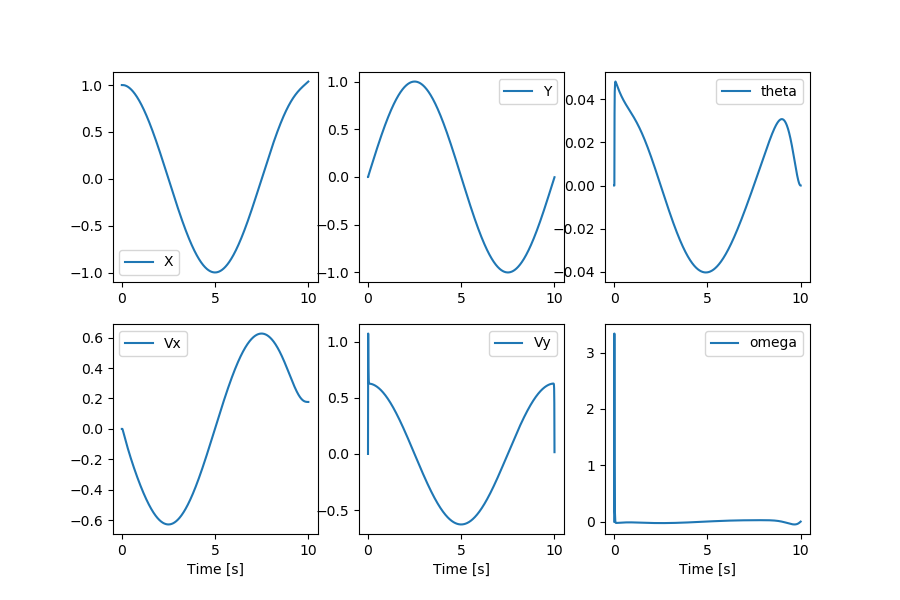

<IPython.core.display.Javascript object>


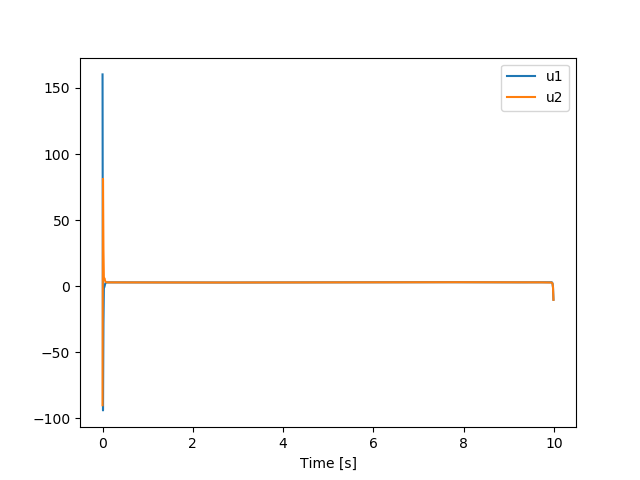

In [20]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('3.1.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('3.2.png')



In [21]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABkpm1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATd2WI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw9AnFzBLajJC5kBgsZD+dDm3n1cO8h9Ywd/7
r078kbebMUh/vahTVmXhTD+xSuAVrLyUF4yRE9z4DL6L2GUIRpqZkZ2Ls0c8TnbwsKhJKplgwSJF
15+RTzKR+e0rR0rHgP7JDSyKkGk9s/8rR/yxJXqzguMh+vsyMCQqpOLZlRdcju6HUaQ8rgwp/HPS
tihwvaiVfZFWbfJHggHvSbsAP9r2pheuyIb+fsbqlSlxylzA8V+Rh/HlABJgolJedE0AwVFxpSm1
62WJuh2oBPDykETxwH4ohYzaXR7OqE2DkFObtxOwUCwfX9+oiq1WrXxD/ALctZL9/HH1FTfFouQH
+nJfkIgygECFHUeEyIEMOTbO08qQnPVrmC2k3e05fGSv/cSAV3y2OiUT1O3t0aSh2dUMzYtd0zWJ
pEgRbApWGa6WM6B3o2LuHhiDCB48saI7geLi3lA/oGPYquiVhtPNIB16Ap7e4ajUkacYvz2Rv7CC
438Hc6i3iQsP9CZEcetj5//hBronipqf6jIHjIzP5W2aG6P0aFn06AtKd6Z5Sb1SKObl8cZsyIkG
FsQne0spYsujDRgr9U0av7Ipsd6C7//9pAGpfX/tYvolB4AkeWZrZ/9GyTsyTxyNAroFan8Df/1+
mseZ8OylP17gRJCSKOt6SD4xpo6ccogDjo5nAwqbWVMoGhshtlmNp7aDPKn9k+cRWlR7ZE28jMeO
wq20CLkeF5HKbP985c8iv4FzgACHbbG8w8zVCwqOIKWgAAF8YAUhAA3exZzNz3pzUxMLqP9spRPB
nShcaoVlbsC24GAOk5Ie/w8MbHFY5TJdelqY2N3KfCE1/7/D+MVza5HZUZWxDI6lH8k0QzjyBrmC
vxjH837gD8r5LaLVI7WODe2HjHeGJCIUL0kTt/rX7/g6WI5Y3wvfCfi30kvz01kyhd33ATObJQOH
8DkulOv+GfGrHWUaJuaKXgAPocjJwh1Qe6eP/mZgeDcwOUJiLIvKOUTwuAirZlf4Ls5b9dKPjmFD
I8CbN2uwp66eCtwlaoJ3vy89u06sNboJeNGye1JXI4A8TeaMrqKRlP/AJu6DRmebH2XtaU9+JiOp
GYLYIusweS9/tzeyweYALNft+4TAdVxB2sJwP+iGWMQEhk7rkaatyeOQBW+aVTVza39WX/Jn4MHm
aLbukgq8XrM7eNNHaPglwLdMKBybAC6mFJeiv2A+jzum2NE4jzFR5oHTA4MWyTtG4A9grMJAnVNw
3LZyNHYIm23Bb0LGG6TWtFVNgAFtUUGPDWFlOqiSMMOEWOO+Cpt55KmXrkK2tOXp3BmJsRwG8taE
BzSg3P3Zaap3T/DtIjwvcvumAQCxytnjeUvfT3vO/W3W58KfmC3NqiHQyNNAy1CdnyXNQc/0BblR
f09kWlessa9VrSYV0WfUl/THVEC/xwATIoVMQ42NQEwINjXYeVHTGETG2B5/+YvmEBTCHsdbAfBW
2n9lwyb3dTSzhD9IUxkXrNgB0cpImtoW3PdfKbHdhLyIhKuxEhviH+Kk1EqOpCvZF/bhEIk7TF+g
3QUJPRlu2eI7Cna8+h+nZrxHVRHNgu3yb1CkUyVCLgGc4QIQ4+OC0FIf//pYLgb/VFpnNI3fVk3C
BkDm6dY6iP+Im6TVvwtoJU8NN6t2aX1XqbFC6J/lFcOaR0NxdwOYe/Ae6tMoHvIcduqvN4Hpx+lM
m7/4lcvRx76Oz2SnIqsx8IdkIc/CM+e0eVeuf584e1EtfSJRmk68W6jJFg02aRAGZH0dVKfcTqe7
VCL+l8qwDK6S73ghIIDHo/m2gVl+gACVtqMJ0ktNBcfIkI6jYoPs1gQLxJJrf1fPCX0K3rxiT1oV
/KbLJmgdii8LdG4qEoO7gTxTUIAAFAEPAxL7FjbQk8ACRb4U8ekb4vJSACpMXabaUpjqQQjW2q5Z
DT6+lKag4YUcMIR9jUH3v0bavzHF4yFZt4IBgu6t5/fKec3XIfeQIe6j4B1Er+IbHrcWJa4Rk5yb
dKZn585h7IJ+ivdJ+Mqh5PzPPMRvF1iOAvgNFWZqjrdNjKgO2Eutv11WkLKOZVUY8ujT7U6NbPP1
mnusoyAD8ciRf3WSdX1JJSW1hkqmulHCupRDaXENwm0E/36ICtoXamlp6zpUZ17b6TobtQMOWyr/
dhocjdFBb34DBTTS5TkxVDdSr+zZ7BdAsFpzx+qrqjBVPNG88RN9EjwVxdWXuvZHS8aUhld3p1cn
esU6CnYrRvDYVbttDuw6vj+8GqunS4Y+8/ZOrS6+wRkE/NNh20tJzIVBwamAjs/TUh+HRKs1+u1x
QC/VA06qFn+BtnCxB9LDv4TWDk6JC/h5Nu4nGBW/vohYa12lnH5fBFs28mW7ujknxC4/QHDNM0Z+
zmQHs8obEWU8C3MCqYCy/MnGFVUX9uvhRMakZS0g5U4PiFU26c32mRFqzyiq2bHUp0qP6L/QZ8GQ
6Hn97AHsmARhTkriy4lGQgXevt4TMa378rgFKW5h9RuFGQqSP2KXns/8IQ+NSIriqA8eUFm057jU
SnjdfqaIzUEnhbxOQArpR

In [22]:
# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.array([1,0,0,0,0,0])
t, state, u = quadrotor.simulate(z0, LQ_controller, horizon_length, disturbance = True)

<IPython.core.display.Javascript object>


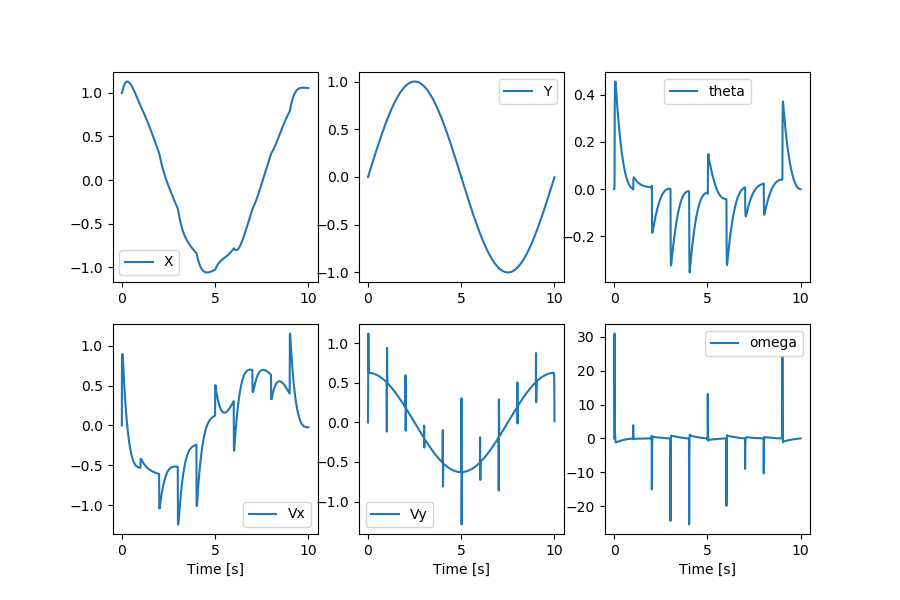

<IPython.core.display.Javascript object>


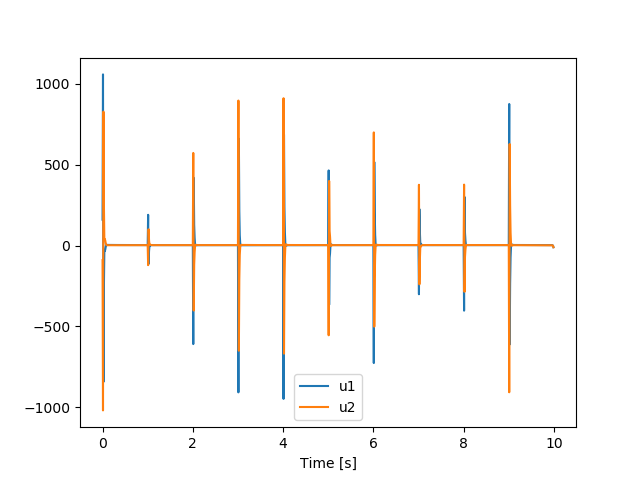

In [23]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('3.3.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('3.4.png')

In [24]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB4dG1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAS4GWI
hAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADAAYjEjf+h/F4zfwAAAMAALcA
GFAMIAqoDCop7v4n7qcQC2GTfPg0RWyJcNZnZIg+ms2iWsBb1ygUhAZBCiCTW6wKSTuAotxSMtmu
F6Ne0JRw9SOVthzL7K70lZCO9aS6cBU914O/IX20vFWMimi1psUwlNWhufuw0v9mYgT7Ser7mL/9
3+1bzHmP9ZZSbcPW2Hfgtv+WpGielLqPJWaGZ50R9TBoBBjQ014j03+vw7tYq/V3+AJ1oCXcaLzW
jfPbLXS1FZwgrSOMoFVS5OFn5CwcvSO64pixh6vHC3mA8lj/XQm71wGCxkP4hildfzLhpTgbNo/Y
+sHg246Em2f72YU1bF4Uw/sUrgFax8lBd8kSOE+Awyi9hlCEaamZGci0M2OM86k6zCUDuLUVJxAV
Gt6OasiLw46FMCxwEZlDEsihV3JXEZpfQLSDJOKquvrcr64SEn6qSzW2/fBIJHIduSOFoMdQBo6D
SLoH8anuKF3UQm9IYsA/XPgYsEIMx0cPDg9UQbJGBcXNvDUdmqdC7q+J+d24ehew/T7IAAADAAII
P4brQgABjFcS6bkABPCbFuTAON4XEejyMTaNyIrC2SJcFs/htsXpa5MgOdUJsHIKc3yHIZQIFIWp
ZXtWLmQLGf4BblrJfv44+og3wrC6TG91BpLeKrgHndSr4xk07Wwm2hor0hOerXMFtJuyO4IMlf+4
kArulsdEonY2vbw0kuB6cC2xa7pmsTSJAiyNSsM10sZ0DvRsXYTfyB27R4BaW1p0XFaf4vANauiM
pWG000gHff7rknkE+BWnGfqf2E9tBnlUGUpnGg9hLH6B74aHZH9tqP/VbbA+mwK5Gb9KgCnIIj6a
GCiPzNSjyDuzxnRV4uAH5uziBAA4Nn3+0BN9svqL8pPooSl4nxx9IFxctK3s5//v7pqYQZ+kUbJR
SOs3NYCtoQHzsZtG8jSECueVqk+///X6UjBPh2YfKNLEGUNyEKwDuj4aaOnHKIA4tuyx7sX1bwmp
YdzFsuqGq6vkMiA32Wr8+8kWj3G8x6I5YdW3KuBtty+6zQL5sCx3cbV+9WAAmG2yOzaNgs20Rt1p
AAADAVBAA4egDn7M283PenNTdnLb2gBc08GdKFxqhWVur4fxf/ZTwj1/h4Y2NpauesVOf9rm3wK4
nFSf7/D+MVzYmgYCF7h/qgBH8k0QzjoIBedVaka5KNZT8zALaDVI7U6yDdfjHeGJCIUL0iucE9r9
/wdLEcsb4Xz2n6/qprO0CWxkfDaw0BoO2hT9wVTf6J9fQP/nWUaIKYzFk3twxjJwh08t4eP/mZge
DcwMOSNpmvWUkkc5AdTX0IQy7OW/VDUUnUAAhy2zdrq6dKABFDcSa0x35ee3adWGtzj4QeAIUzkM
auySgsyl5skY7/wpuU9XWE49PjCoi9QSA9owYA2CHe5jn7H8QYq5Dpghy5/ROEwIDECfKT1/oYvE
BS6t05ftd+BO/E41FD4dMyl8PXh/Uq2wU/43zG3FJBV4tBWd2hJHaPgOw1cYoCoNAFZMK+k2vvQA
HndPzSidGxHRzQOtOdO527JpUAAKOMUHTtxfyzGg+MH8aDFX0+2VrqbmAA3xgCXIAH92vOcr+c+S
9FkO4MxNiOA3lrQfpCc7xHPcUjhrdw9oCwxDvdamhiZrL2HvKXvp33nlgqN6aHhVD+yiWMUBjy3K
zeeVvDtjZ/JjO+Y1tPZFpXrLGvVa0m+FlSTqWttu427ccRMiFTEONjUtPGJ3LWh37YrqMImNsDuN
NRILY9MEM2EeBNCVvQi1hk3u6mlnCH6QuoGndUIsui3DEH3sB+GQRY0oSGdREHvuhl4Vwrc4Gbhd
rdTJGJGUyckORpMT8KtgiqX+naZVtW0CLsAcw5NECeTHaacxry3vfayN42pg/9jrSiDiYg0xp8//
sPwnWYiFIWqxyOfePX3f1WFgqoGFwrGqmXxsZgrRogP0aEqrnafFt/tBFhFiEGCrxbVl3Dk1LMKR
+OCaw0XKArnLtBkXh45Qv9p/YJbzr/76WQAzTOiQeIGkptYX97BHDq0ukfsGvHtCHqYmWYvHVyVg
9IhXINc9mvYWGAnIRGk6lM83emPzFtYv1sasMIAZkVVAaNdkCILpIrKkl2EHy9e1KGPHf14S/ZEa
4G9ORW5Sv+3f++6pKrAgl/DwbZBpLeJ0w6n/CCnxqwAAAwAHd8AG/0Ah717A4DXHUghe7uXdYlSS
mxG/Z0toSXy9zpEjPZI473zlq7+mfPjylmwPhVmv7VHa5Bva49zxGOJvIVYfqXbLkv2PkJPbaMHR
4J55iwWw6Ixq6i1iniG48aggOxpx/n17sIw5tZdw6AbpSIe5WjcCM9p58HLjtOPo9Cmf9dDgJ8j3
TgnFi1IWDGHHxw1AADfXJtQeMzovy7U0tPWdKjOvbkA48ZaBhCz7bVf4BXM0dlFBb34DBTTS5xZu
YyCoDv8T4LugWC054/OBJhwsfHixiBPhMuw3B+p/zC04AOZGCX9116jMH+/eamXYXapTxYwg1qEs
VigsaX83i0on5z5H/9xXiJAtSISiaWzBMNzxAeHA61R2+ZRg/nkzj1hpOun/R8EjvLe3esZfKxY3
8qnxtpQBlEVRPnV5ZUz3x8oLR6lUZ6rQjWWsdAQsh/8pFFV1MuQrJhFharIWM0VtRt9ZKzbJNJNj
hxo6fgkV9LvYwDmvFIhzkTVtmlqnQJOi3NRd6rdOZny+Z78Zy0Z8rd3fB/sgY0ZeIvREkbm9xCy/
Ki4Lbh8lisAJu+ZM7uZZPwVu/2p0Akkv5gGl8cdqwSFlzzVwSBx9fkRO6RmYAJfW8ZkgxPPse8Pm
ciBpO7uGva6/7sQEe6RKt

In [25]:
def LQpiby4_controller(state,i):
    
    z_star = np.array([0,0,0,0,0,0]).T
    u_star = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2]).T
    
    A, B = get_linearization(z_star, u_star)
    
    Q = np.array([[10e+5, 0., 0., 0., 0., 0.], 
                  [0., 50.0, 0., 0., 0., 0.], 
                  [0., 0., 10e+5, 0., 0., 0.], 
                  [0., 0., 0., 50.0, 0., 0.], 
                  [0., 0., 0., 0., 10e+5, 0.], 
                  [0., 0., 0., 0., 0., 50.0]])
    
    R = np.array([[0.001, 0.],[0., 0.001]])
    
    N = 1000  # horizon_length
    
    z_bar = np.zeros((A.shape[0],N+1))
    
    theta = 2*np.pi

    for j in range(N+1):
        
        z_bar[:,j] = np.array([np.cos(theta*j/N), 0, np.sin(theta*j/N),0, np.pi/4, 0]).T
        # print(z_bar)
    
    K, k = solve_LQR_trajectory(A, B, Q, R, z_bar, N)
    
    
    u = np.matmul(K[i],state) + k[i] + u_star
    
    return u

In [26]:
# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.array([1,0,0,0,0,0])
t, state, u = quadrotor.simulate(z0, LQpiby4_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


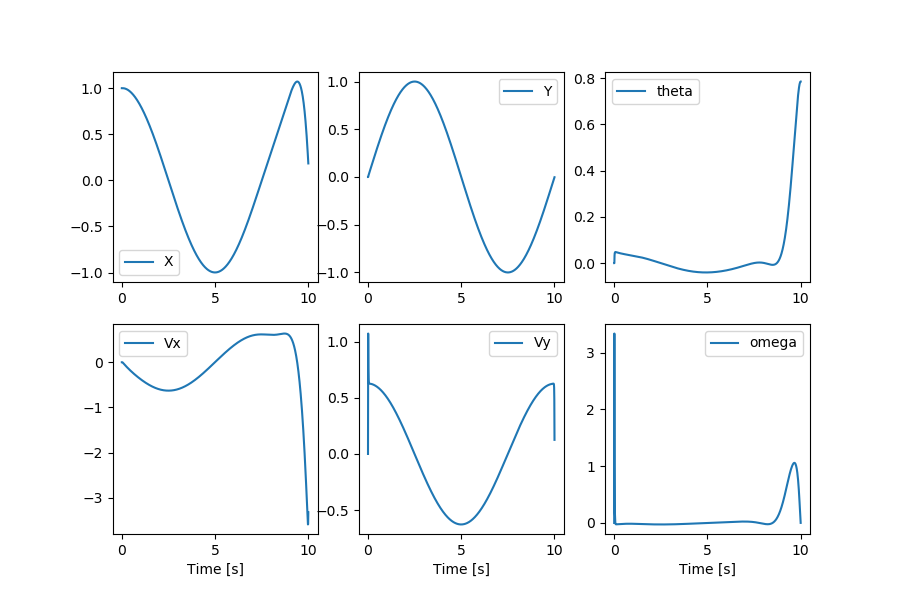

<IPython.core.display.Javascript object>


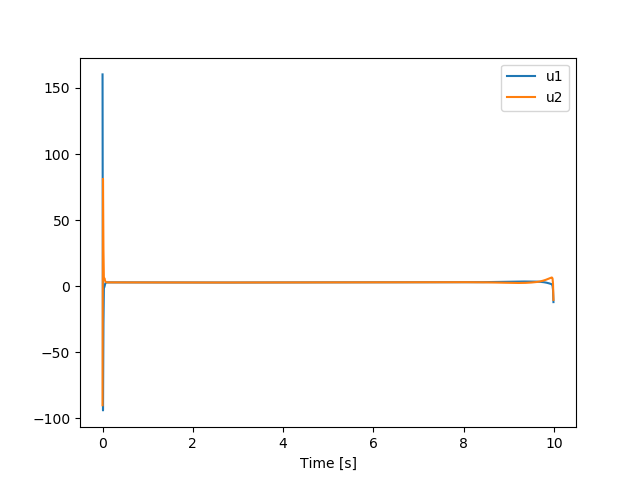

In [27]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('3.5.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('3.6.png')

In [28]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABpiG1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATd2WI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw9AnFzBLajJC5kBgsZD+dDm3n1cO8h9Ywd/7
r078kbebMUh/vahTVmXhTD+xSuAVrLyUF4yRE9z4DL6L2GUIRpqZkZ2Ls0c8TnbwsKhJKplgwSJF
15+RTzKR+e0rR0rHgP7JDSyKkGk9s/8rR/yxJXqzguMh+vsyMCQqpOLZlRdcju6HUaQ8rgwp/HPS
tihwvaiVfZFWbfJHggHvSbsAP9r2pheuyIb+fsbqlSlxylzA8V+Rh/HlABJgolJedE0AwVFxpSm1
62WJuh2oBPDykETxwH4ohYzaXR7OqE2DkFObtxOwUCwfX9+oiq1WrXxD/ALctZL9/HH1FTfFouQH
+nJfkIgygECFHUeEyIEMOTbO08qQnPVrmC2k3e05fGSv/cSAV3y2OiUT1O3t0aSh2dUMzYtd0zWJ
pEgRbApWGa6WM6B3o2LuHhiDCB48saI7geLi3lA/oGPYquiVhtPNIB16Ap7e4ajUkacYvz2Rv7CC
438Hc6i3iQsP9CZEcetj5//hBronipqf6jIHjIzP5W2aG6P0aFn06AtKd6Z5Sb1SKObl8cZsyIkG
FsQne0spYsujDRgr9U0av7Ipsd6C7//9pAGpfX/tYvolB4AkeWZrZ/9GyTsyTxyNAroFan8Df/1+
mseZ8OylP17gRJCSKOt6SD4xpo6ccogDjo5nAwqbWVMoGhshtlmNp7aDPKn9k+cRWlR7ZE28jMeO
wq20CLkeF5HKbP985c8iv4FzgACHbbG8w8zVCwqOIKWgAAF8YAUhAA3exZzNz3pzUxMLqP9spRPB
nShcaoVlbsC24GAOk5Ie/w8MbHFY5TJdelqY2N3KfCE1/7/D+MVza5HZUZWxDI6lH8k0QzjyBrmC
vxjH837gD8r5LaLVI7WODe2HjHeGJCIUL0kTt/rX7/g6WI5Y3wvfCfi30kvz01kyhd33ATObJQOH
8DkulOv+GfGrHWUaJuaKXgAPocjJwh1Qe6eP/mZgeDcwOUJiLIvKOUTwuAirZlf4Ls5b9dKPjmFD
I8CbN2uwp66eCtwlaoJ3vy89u06sNboJeNGye1JXI4A8TeaMrqKRlP/AJu6DRmebH2XtaU9+JiOp
GYLYIusweS9/tzeyweYALNft+4TAdVxB2sJwP+iGWMQEhk7rkaatyeOQBW+aVTVza39WX/Jn4MHm
aLbukgq8XrM7eNNHaPglwLdMKBybAC6mFJeiv2A+jzum2NE4jzFR5oHTA4MWyTtG4A9grMJAnVNw
3LZyNHYIm23Bb0LGG6TWtFVNgAFtUUGPDWFlOqiSMMOEWOO+Cpt55KmXrkK2tOXp3BmJsRwG8taE
BzSg3P3Zaap3T/DtIjwvcvumAQCxytnjeUvfT3vO/W3W58KfmC3NqiHQyNNAy1CdnyXNQc/0BblR
f09kWlessa9VrSYV0WfUl/THVEC/xwATIoVMQ42NQEwINjXYeVHTGETG2B5/+YvmEBTCHsdbAfBW
2n9lwyb3dTSzhD9IUxkXrNgB0cpImtoW3PdfKbHdhLyIhKuxEhviH+Kk1EqOpCvZF/bhEIk7TF+g
3QUJPRlu2eI7Cna8+h+nZrxHVRHNgu3yb1CkUyVCLgGc4QIQ4+OC0FIf//pYLgb/VFpnNI3fVk3C
BkDm6dY6iP+Im6TVvwtoJU8NN6t2aX1XqbFC6J/lFcOaR0NxdwOYe/Ae6tMoHvIcduqvN4Hpx+lM
m7/4lcvRx76Oz2SnIqsx8IdkIc/CM+e0eVeuf584e1EtfSJRmk68W6jJFg02aRAGZH0dVKfcTqe7
VCL+l8qwDK6S73ghIIDHo/m2gVl+gACVtqMJ0ktNBcfIkI6jYoPs1gQLxJJrf1fPCX0K3rxiT1oV
/KbLJmgdii8LdG4qEoO7gTxTUIAAFAEPAxL7FjbQk8ACRb4U8ekb4vJSACpMXabaUpjqQQjW2q5Z
DT6+lKag4YUcMIR9jUH3v0bavzHF4yFZt4IBgu6t5/fKec3XIfeQIe6j4B1Er+IbHrcWJa4Rk5yb
dKZn585h7IJ+ivdJ+Mqh5PzPPMRvF1iOAvgNFWZqjrdNjKgO2Eutv11WkLKOZVUY8ujT7U6NbPP1
mnusoyAD8ciRf3WSdX1JJSW1hkqmulHCupRDaXENwm0E/36ICtoXamlp6zpUZ17b6TobtQMOWyr/
dhocjdFBb34DBTTS5TkxVDdSr+zZ7BdAsFpzx+qrqjBVPNG88RN9EjwVxdWXuvZHS8aUhld3p1cn
esU6CnYrRvDYVbttDuw6vj+8GqunS4Y+8/ZOrS6+wRkE/NNh20tJzIVBwamAjs/TUh+HRKs1+u1x
QC/VA06qFn+BtnCxB9LDv4TWDk6JC/h5Nu4nGBW/vohYa12lnH5fBFs28mW7ujknxC4/QHDNM0Z+
zmQHs8obEWU8C3MCqYCy/MnGFVUX9uvhRMakZS0g5U4PiFU26c32mRFqzyiq2bHUp0qP6L/QZ8GQ
6Hn97AHsmARhTkriy4lGQgXevt4TMa378rgFKW5h9RuFGQqSP2KXns/8IQ+NSIriqA8eUFm057jU
SnjdfqaIzUEnhbxOQArpR

In [29]:
# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.array([1,0,0,0,0,0])
t, state, u = quadrotor.simulate(z0, LQpiby4_controller, horizon_length, disturbance = True)

<IPython.core.display.Javascript object>


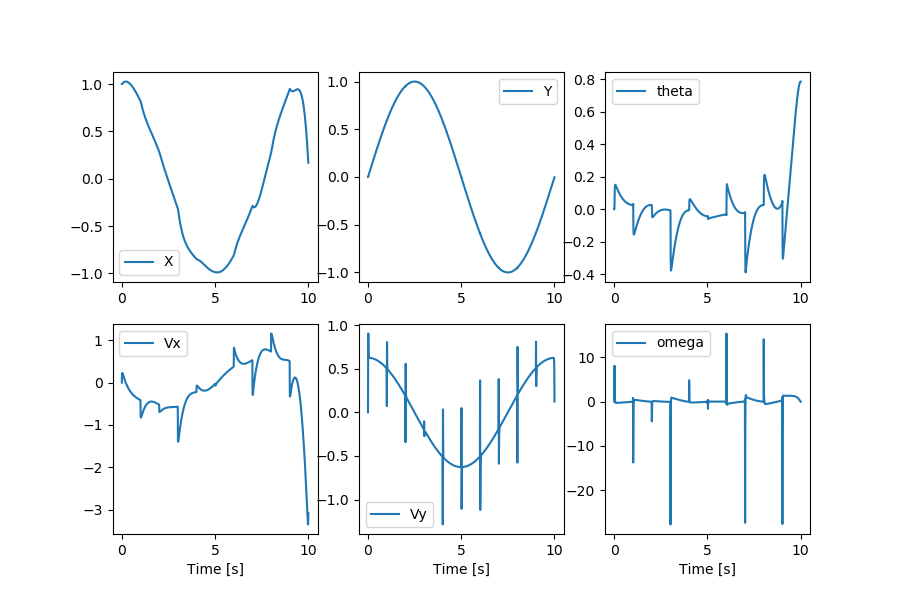

<IPython.core.display.Javascript object>


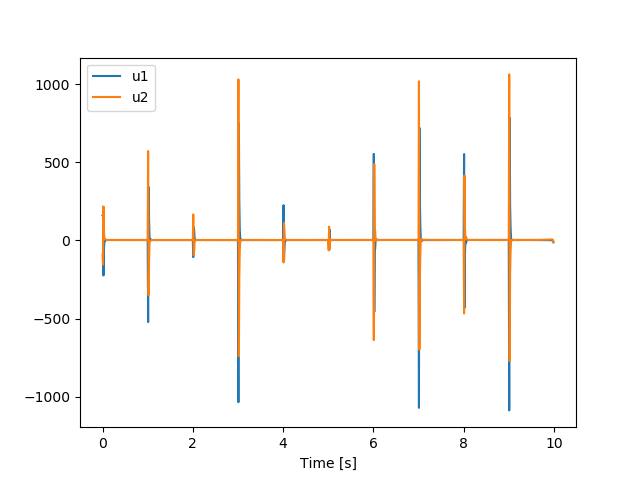

In [30]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('3.7.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('3.8.png')

In [31]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB0c21kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATDWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw9AnFzBLajJC5kBgsZD+dDm3n1cO8h9Ywd/7
r078kbebMUh/vahTVmXhTD+xSuAVrLyUF4yRE9z4DL6L2GUIRpqZkZ2Ls0c8TnbwsKhJMDbn/hEj
fNcm8+SIvDjoUwLHAP7JDSyKFXclcRmt9BGJK9bQ5a+tyvshISfqpLNbc98Eg8ch3EJCWgx1AGjo
NIugfxqe4oXdQ6fcpPADfdeSsL13njFseGyTJ82SWC43ZeGo69U5t3lzT83uO8S9furyUAAAAwAO
AfvXiOgACcu4N1FIACeE1xiQQY9IuI9HkYmy7kTtQsES4LZ/DbYvS2CZAc6oTYOQU5vrOQygQKQt
SyvasTlGDN6aN4VDJTeIWSAqqwrC6TG91BpLfJrgHndSr4xk07Wwm2Y6OA5OerXMFtJu9nVLu39o
V15hvlsdEonY2vbw0kuB6jytj15QKFjPP8PeDCs56Jsw8DvRsXcTfyB27x5ZEBywOipdi0vANaui
MpWG080gHXoCpC7hp9SRvlouP7Ce2gzyqDKYzjRwqdH8fN8NDsj+21IHqtVgfTZFcjN+lQBTkER/
NDBRL5mmx5B3Z4zpK8XAD83ZxAgAgGz8fcAm+1n1F+Un0UJS8T45+j64uWlb2c//391FYIM/SKNk
opHWbqsDW0CD52M2jeRpCBXQK1Q/f//r9Khpnw7KflGliDLG5CGux/ScNNHTjlEAcW3ZY92NauYT
TsO6i2XbDVdXyGRAb7LR+feSLR7jeY9McsOrWlXC225fdZoF8noHg+gMF/vAAIdtuLs9maoWFSmk
zgAAAwKggAcPQBz9mbmbnvTmpinluBQAuaeDOlC41QrK3V8S4v/sp4R6/w8MbG0tfPWKnP+1zb9F
cTipP9/h/GK5sTUMBC9w/1QAj+SaIZx00QvOqtSNclGsp+ZgFtFqkdqZ4BwvxjvDEhEKF6RXOIe1
+/4OliOWN8L57T9f1U1naBRYyPh9YZ6iupsC+Ga4Qjgwr2eV9vq9k2Z+cnAYJ5jJwhz8x4eP/mZg
eDcwMOSNpmvV8kkc5AdTX0KQ91U9qjjcUnUAAhy2zdrq6dKABFDcQ60y35ee3adWGtzj4QfAIUzk
MauaSgs0d3g5R4/qyeHQqzPWhHdeJzwQSA9owYA2CHuzjn7H8QZK5DpgJy5+ZuEwIDECfLYLv/sd
l75s4ZO65Gvrcnjkyb2omUzNlnfh8sBHgBg8zII0DXS3i9FX/xpo7R8EuBbohQOTYAXUwqMUj+Ug
3xHk+38uI8xUeaB1pnupvE71uAAA7MJPbpzsjR2CJsF3EpZkYbpNa6S2cAAB6jAEuQAP7tec5X85
0JTQCdwZibEcBvLWg+fooNz92Wmqd0/0LToBiHe61NDEzeFsPeUvfU3vPLBUb00PCqH9lEqvcDFS
OVm88reHbG0DDOUZvf09kWlessa9VrSYjZHlSZ/pjqiBf44AJgUKmIcbGoCd+FhrsPKjpjCJjbBB
O6x18Ec3oWilqlXBW2n+nrgJ3W6Eodm64nhBnmcmz5i3DSP4UB+GQXny66Eb9EHvvBY5+lq8QSjs
iCHDYCn2Uycr2RpMVPygZ/OHpf8LJZ2kA4X1cIcmyLhHGGtN/sP33zJRG8dEwgBs3JAOCGJiDggU
ZFY5HdldZhFOLtCEUWAWZlnV+tWdAfek1jadFg63jYu1pKoKbo1apjnv/yzKJoTIbi7gkpCD8oYO
qFl4uY3dVebwPTj+Qf22/4lcnVALW+Rvc4jzDfsKTIQ5+EaZeQ2xeKFo2ufWoJTLWWpwb+LdSFFI
9Pz+7t8yqJ+IzQjqe7VKL+l8q1Hq6S73ghIIDHo/m2gVEogACVtqMJ0kt5eQp6KiOo2KD6luTA9R
rHQg+llTVArIPPUZFdZ5TYXmn+y9o9Q3qTENyJ6AAAADAFrhAEv+TNAyCv2aKrevIsFqy1RHGkk2
Oak9RX4DOsarsZy/4BXuiiqyiqDJkrImaMAlhN40grEh0BFa512w+YJzLnVriklwM1nxjfSZ+46F
Dr3xLeAT3PZaugk+b7gUOG2EHUStxXuWSR8Lr/i5Me8qIhPJzgiWR0SetSkn+sUvT16SqtOT5Fmz
h+xsKebKwwrf3xH9JKeNoUNai/ZOk8h0wE4sWpCwYw4+PzMvmFsxYDVn4slbQu1NLT1nSo6b20n3
QwCgRtvSmh92YpuUlzmxgBmAwU00uZJ0yJGwyasI+C7oFgtOePz0SYSYkPIvF9lgS6toWROz7cyZ
YJhwfEcVY6RmTcKYn5p8Q2FW3dQ+1GQimwWOv6wwro7Jfz67X4TAJkH49QOegsVgf3rVeXiSjnsY
qh7dnuPUxIyWSWOaw/sBdZ9qfbMSgLCez4rSkIEgJGPPQgpDVWdFjq/TrS3HswFyrKwlBUVwjINB
zxQdEnkXRsUTt3BKZo9nY9nL8Funs4otSNkI0alFhhPemDkMKk+CahWt6U0Sgy/94j4O6nR/FmXA
vCKt/KjUAQXdnmqZbPT/4WOSczPZ9GZvFgnqRu8ML9GjFGpn/8IWj2n4X5CM8jAnm7IEHd/5V6G6
pI6l5rrmlnbR5oY0N3sAl

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?


In [32]:

def compute_cost(z, u, horizon_length):
    
    z_trajectory1 = np.array([0,0,0,0,0,0]).T    
    z_trajectory2 = np.array([3,0,3,0,np.pi/2,0]).T    
    z_trajectory3 = np.array([0,0,0,0,0,0]).T
    
    u_desired = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2])
    
    cost = 0

    for i in range(horizon_length):
        
        R = np.array([[1., 0.],[0., 1.]])

        if i<350:

              
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 2., 0.], 
                          [0., 0., 0., 0., 0., 2.]]) 
            
            z_desired = z_trajectory1
            
        elif i>350 and i<500:
            

            Q = np.array([[100., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 150., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 200., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
            
            z_desired = z_trajectory2
            
        elif i>500 and i<650:

            
            Q = np.array([[200., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 200., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 100., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
            
            z_desired = z_trajectory3
            
        else:

            
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 3., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
            
            z_desired = z_trajectory3


        cost_val = np.matmul(np.transpose(z[:,i] - z_desired), np.matmul(Q, (z[:,i] - z_desired))) + np.matmul(np.transpose(u[:,i] - u_desired), np.matmul(R, (u[:,i] - u_desired)))
    
        cost += cost_val
        
   
    terminal_cost = np.matmul(np.transpose(z[:,-1] - z_trajectory3), np.matmul(Q, (z[:,-1] - z_trajectory3)))
    
    cost += terminal_cost

    return cost

In [33]:
def get_quadratic_approximation_cost(z, u, horizon_length=1000):   
    
    z_trajectory1 = np.array([0,0,0,0,0,0]).T
    z_trajectory2 = np.array([3,0,3,0,np.pi/2,0]).T
    z_trajectory3 = np.array([0,0,0,0,0,0]).T
    
    list_of_A = []
    list_of_B = []
    list_of_Q = []
    list_of_R = []
    list_of_q = []
    list_of_r = []
#     
    u_star = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2]).T

    for i in range(1000):
#         print(i)
        
        A,B = get_linearization(z[:,i],u[:,i])
        
        if i < 350:
            
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 2., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory1))
            
        elif i >350 and i < 500: 
            
            Q = np.array([[100., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 150., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 200., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory2))
            
        elif i > 500 and i < 650:
            
            Q = np.array([[200., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 200., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 100., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory3))
            
        else:  
            
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 3., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory3))
 
    
        list_of_A.append(A)
        list_of_B.append(B)
        list_of_Q.append(Q)
        list_of_R.append(R)
        list_of_q.append(q)
        list_of_r.append(r)

    q = np.matmul(Q, (z[:,-1]-z_trajectory3))
    
    Q = np.array([[5., 0., 0., 0., 0., 0.], 
                  [0., 2., 0., 0., 0., 0.], 
                  [0., 0., 5., 0., 0., 0.], 
                  [0., 0., 0., 2., 0., 0.], 
                  [0., 0., 0., 0., 3., 0.], 
                  [0., 0., 0., 0., 0., 2.]])
    
    list_of_Q.append(Q)
    list_of_q.append(q)
    
        
    return list_of_A, list_of_B, list_of_Q, list_of_R, list_of_q, list_of_r


In [34]:
def solve_iLQR(A, B, Q, R, q, r, N):
    
    list_of_K = []
    list_of_k = []
    list_of_P = []
    list_of_p = []

    QN = Q[-1]
    qn = q[-1]

    list_of_P.append(QN)
    list_of_p.append(qn)
    
    A.reverse()
    B.reverse()

    for i in range(N):

        K = np.matmul(- np.linalg.inv(np.matmul(np.transpose(B[i]), np.matmul(list_of_P[i], B[i])) + R[N-i-1]), np.matmul(np.transpose(B[i]), np.matmul(list_of_P[i], A[i])))
        
        P = Q[N-i-2] + np.matmul(np.transpose(A[i]), np.matmul(list_of_P[i], A[i])) + np.matmul(np.transpose(A[i]), np.matmul(list_of_P[i], np.matmul(B[i], K)))

        list_of_K.append(K)
        list_of_P.append(P)
                
        k = np.matmul(- np.linalg.inv(np.matmul(np.transpose(B[i]), np.matmul(list_of_P[i], B[i])) + R[N-i-1]), np.matmul(np.transpose(B[i]), list_of_p[i]) + r[N-i-1])
        
        p = q[N-i-2] + np.matmul(np.transpose(A[i]), list_of_p[i]) + np.matmul(np.transpose(A[i]), np.matmul(list_of_P[i], np.matmul(B[i], k)))

        list_of_k.append(k)
        list_of_p.append(p)
        
    list_of_K.reverse()
    list_of_k.reverse()
    
    return list_of_K, list_of_k

In [35]:
def get_new_state_control(z, u, K, k, alpha, horizon_length):
    
    u_n = np.zeros_like(u)
    z_n = np.zeros_like(z)
    
    z_n[:,0] = np.array([0, 0, 0, 0, 0, 0])

    for i in range(horizon_length):
        
        u_n[:,i] = K[i]@(z_n[:,i]-z[:,i] ) + alpha*k[i] + u[:,i]

        z_n[:,i+1] = quadrotor.get_next_state(z_n[:, i], u_n[:,i])

    z_new = z_n
    u_new = u_n
    
    return z_new, u_new

In [36]:
N = 1000
z0 = np.array([0, 0, 0, 0, 0, 0])
u = np.ones([quadrotor.NUMBER_CONTROLS, N])
z = np.zeros([quadrotor.NUMBER_STATES, N+1])

alpha = 1.0

while alpha > 0.01:
        
    z[:,0] = z0
    for i in range(N):
        z[:, i+1] = quadrotor.get_next_state(z[:, i], u[:,i])

    old_cost = compute_cost(z, u, N)

    A, B, Q, R, q, r = get_quadratic_approximation_cost(z, u, N)

    K, k = solve_iLQR(A, B, Q, R, q, r, N)      

    z_new, u_new = get_new_state_control(z, u, K, k, alpha, N)
    
    new_cost = compute_cost(z_new, u_new, N)
    
    if new_cost < old_cost:
        
        old_cost = new_cost
    else:
        
        alpha = alpha/2
        
    u = u_new

quadrotor.animate_robot(z, u)


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAByfW1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAS4GWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqeBnDJswcSgynZohAlvbWJk8Dyv1WZG8yfgAAsc
XQ5U2L6oAADwjcHQ2SXnAA5Y2scfE+tZkPk76cuSKhoevPLJxJqTjnoFIJN/P2mLysMgf4APpVPZ
vergodcPy1Te5Gntx2a/Qkwey52yrSTLuPs4y7VyieirmiE8L5uJO3aslqQr9fGPka2btAAd5Am9
d5A5wE9mEWLP6a78GYF2nl66Nj1jSzKPmDgGVxkX/K7gwg/GxDj2VmqsR0w3UYuGIJI/gTS+dJQA
b7fmtWeyqqRrmsJssddH0IGAa8ZK9E9oqvkMAYB1mP94Yp+YAPf01+m+sTsOvGS5NgIqKv4ywFoe
VTVH/LyobYg7issh5TxcLRM7qrZJyJzaJ7BG2aXLPK7D7aWVQznPPIBU5HXZNCqGom/nOaPYna8O
2jprDpixVroA7d+bekWDYpPBP5ymjYPkkdQl+Koi0t2Ik6k0SFU0HEBxOQ1ghN0x8gNAeU0MVhIY
csd0j98NOxG3I2SJRIaiP3x/93Jklz+e5Md2x8HgyxlBwxwnqfbPWelHVwVVsPxPHYv6fZkLFY+u
WXykNr1qf0qA4j7f77JZv5O6bXlCwzaxMZqcogMvevVzEzIX6FGegxZM5bQGc9Y49hHT91WKqOTD
q/YVsFWtjpiZIZLM37GzE3gDLCq4sEs9icTXinJdftwnwlQZHOKllkt+xDML+lak5UVMMLu9iSvq
1Njh6K7AqxlCkDpoRuODF431hj8zLWkRG6+jTWWbggKFujLCGP4qt9YNu0IKKoEkLpKnoQTwMwDC
6tQ86MzyeOj0uhOk09Oj+4Kg8j9rZr/Qx7FuKFbVGmhVVpJ+DqBzsRKmHMC0yrNARMlvQAmSS3fT
5TsqAV4z1pnosnX5ETux2xqhkQcVenA+r69MdXVOEF/CbLHyW//U6p7uCfoeBnYqvAamdglrIaN6
oQhIJgxRBcmrQvTxLHTpmeTNl1Bbm9fKf/cePgw1aSZaotmuK1QDoj/umsRgTTuZJoGHcw/AYyw+
dka8QTn/QfNdI+RIDugAA

<IPython.core.display.Javascript object>


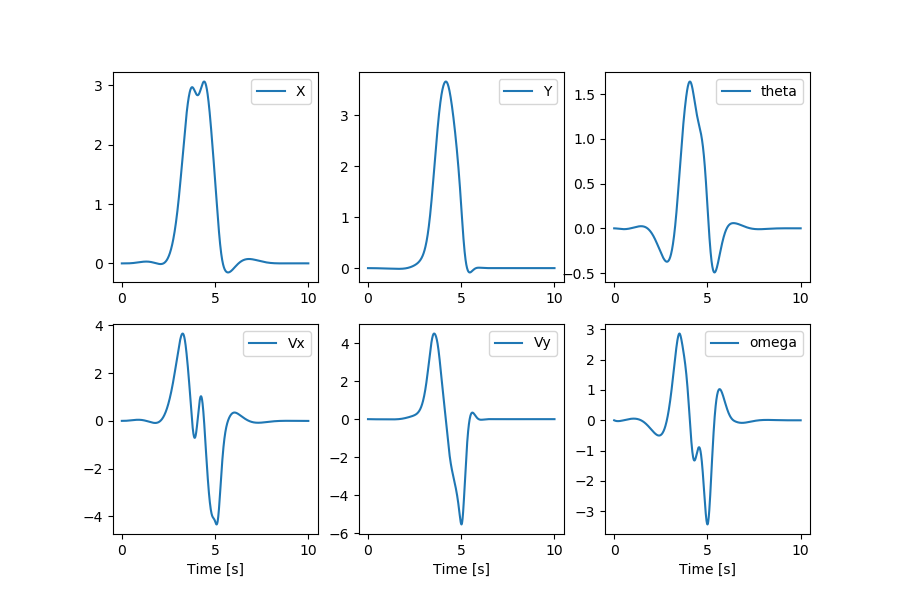

<IPython.core.display.Javascript object>


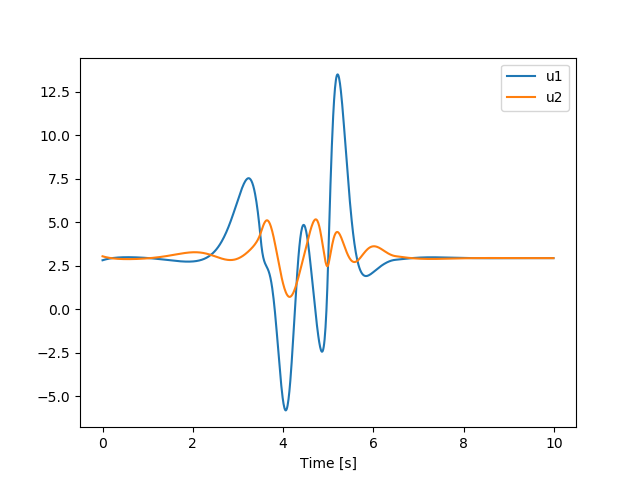

In [37]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, z[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, z[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, z[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, z[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, z[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, z[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('4.1.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('4.2.png')

### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [38]:
def compute_flip_cost(z, u, horizon_length):
    # iterating cost
    
    z_trajectory1 = np.array([0,0,0,0,0,0]).T    
    z_trajectory2 = np.array([1.5,0,3,0,np.pi,0]).T    
    z_trajectory3 = np.array([3,0,0,0,np.pi*2,0]).T
    
    u_desired = np.array([(quadrotor.MASS*9.81)/2, (quadrotor.MASS*9.81)/2])
    
    cost = 0

    for i in range(horizon_length):

        
        R = np.array([[1., 0.],[0., 1.]])

        if i<350:

              
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 2., 0.], 
                          [0., 0., 0., 0., 0., 2.]]) 
            
            z_desired = z_trajectory1
            
        elif i>350 and i<500:
            
            Q = np.array([[10., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 100., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 200., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
            
            z_desired = z_trajectory2
            
        elif i>500 and i<650:
            
            Q = np.array([[20., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 20., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 500., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
            
            z_desired = z_trajectory3
            
        else:
            
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 3., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
            
            z_desired = z_trajectory3


        cost_val = np.matmul(np.transpose(z[:,i] - z_desired), np.matmul(Q, (z[:,i] - z_desired))) + np.matmul(np.transpose(u[:,i] - u_desired), np.matmul(R, (u[:,i] - u_desired)))
    
        cost += cost_val
        
   
    terminal_cost = np.matmul(np.transpose(z[:,-1] - z_trajectory3), np.matmul(Q, (z[:,-1] - z_trajectory3)))
    
    cost += terminal_cost

    return cost
    


In [39]:
def get_quadratic_approximation_flip_cost(z, u, horizon_length=1000):   
    
    z_trajectory1 = np.array([0,0,0,0,0,0]).T
    
    z_trajectory2 = np.array([1.5,0,3,0,np.pi,0]).T
    
    z_trajectory3 = np.array([3,0,0,0,np.pi*2,0]).T
    
    list_of_A = []
    list_of_B = []
    list_of_Q = []
    list_of_R = []
    list_of_q = []
    list_of_r = []
#     
    u_star = np.array([(quadrotor.MASS*9.81/2), (quadrotor.MASS*9.81/2)]).T

    for i in range(1000):
#         print(i)
        
        A,B = get_linearization(z[:,i],u[:,i])
        
        if i < 400:
            
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 2., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory1))
            
        elif i >400 and i < 500: 
            
            Q = np.array([[10., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 100., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 200., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory2))
            
        elif i > 500 and i < 650:
            
            Q = np.array([[20., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 20., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 500., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory3))
            
        else:  
            
            Q = np.array([[5., 0., 0., 0., 0., 0.], 
                          [0., 2., 0., 0., 0., 0.], 
                          [0., 0., 5., 0., 0., 0.], 
                          [0., 0., 0., 2., 0., 0.], 
                          [0., 0., 0., 0., 3., 0.], 
                          [0., 0., 0., 0., 0., 2.]])
    
            R = np.array([[1., 0.],[0., 1.]])
            
            r = np.matmul(R,(u[:,i]-u_star))
            q = np.matmul(Q, (z[:,i]-z_trajectory3))
 
    
        list_of_A.append(A)
        list_of_B.append(B)
        list_of_Q.append(Q)
        list_of_R.append(R)
        list_of_q.append(q)
        list_of_r.append(r)

    q = np.matmul(Q, (z[:,-1]-z_trajectory3))
    
    Q = np.array([[5., 0., 0., 0., 0., 0.], 
                  [0., 2., 0., 0., 0., 0.], 
                  [0., 0., 5., 0., 0., 0.], 
                  [0., 0., 0., 2., 0., 0.], 
                  [0., 0., 0., 0., 3., 0.], 
                  [0., 0., 0., 0., 0., 2.]])
    
    list_of_Q.append(Q)
    list_of_q.append(q)
    
        
    return list_of_A, list_of_B, list_of_Q, list_of_R, list_of_q, list_of_r


In [40]:
N = 1000
z0 = np.array([0, 0, 0, 0, 0, 0])
u = np.ones([quadrotor.NUMBER_CONTROLS, N])
z = np.zeros([quadrotor.NUMBER_STATES, N+1])

alpha = 1.0

while alpha > 0.01:
        
    z[:,0] = z0
    for i in range(N):
        z[:, i+1] = quadrotor.get_next_state(z[:, i], u[:,i])

    old_cost = compute_flip_cost(z, u, N)

    A, B, Q, R, q, r = get_quadratic_approximation_flip_cost(z, u, N)

    K, k = solve_iLQR(A, B, Q, R, q, r, N)      

    z_new, u_new = get_new_state_control(z, u, K, k, alpha, N)
    
    new_cost = compute_flip_cost(z_new, u_new, N)
    
    if new_cost < old_cost:
        
        old_cost = new_cost
    else:
        
        alpha = alpha/2
        
    u = u_new

quadrotor.animate_robot(z, u)


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABxI21kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAS2GWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqeBnDJswcSgynZohAlvbWJk8Dyv1WZG8yfgAAsc
XQ5U2L6oAADwjcHQ2SXnAA5Y2scfE+tZkPk76bPy2OLv6japU08vikCb4UC/Qdx3LGQSZk7ideRe
EBZXfVDTH9SHkAxW3+8YOMPHO8BEqMa+FU6WF8Ox6gMAxv1vKHp6hBcQEe1tjgGtKlCAZsAm+R4s
ZL595iSwZMWAql6NgTDp9djJJvW5xyGjzAyid/awjOt/YrjvSKxFOE1cbqMXDTkOaRmMWLiSKs6f
y+xPBc/ivUyJdyaw3dMG4MrBBmORF6NuGB7+VDH+1OPHjmU34zbUusTsM/GS5NgIqKv4ywFoeVTV
H/LyobYg68HvZ5TxcLRM7qrZJyJwzDkBhyVvpMHmCuDg8mnOeeQCpyOuyg1V9RN/Oc0exO179X7T
WHTFirXQB27829IsAhiw1PvOaNgpl6/ppBj7UJEGRZFhokKpoOIBSuk8SFyKgBLHMaSkMVhILnsd
0j98NOwu3I2SJRIaiPvx/93JkmLz+YMdpx7Wu6sEzQxwnqfbPIVSNbGZAubh+J47GBpsJW2mQZmO
XrDU+Tn96z/VIHRr0WnjiYoVEZoakdJZxxyys6CA4O42lMCa3DMBU7kNy3zsbYpZiXsmNexQGuAA
Bz41TJcwxpiZIZLMz6wUdsv8n70oPklWUb564vDGezRj2mZljZ/5GyBeWNwa390VpKEQ9UsU4OoP
7rBCy0bafqfqU4ikrbsiOyfxTCwldpfUwgVs41pWVSoWuAaXjaQ1p1JnRwT04feWc1x6RBPAlSlL
q1D6tCZjm7WIO1y7dHKGtVdlCcl+xzMuqlV1OBZYXh0gEH4LBCHsi34DX9S6hL4Aiq1fAYaIt30+
U7KgFQdpAY4HH1+RE7sYsGlx63jMkGJ59j59lJyt5v4roP9rr/1EsQZgaRDwM7FV4DUzsEtZDRvV
CEJCVjFEFyawQaiEE+YhRpMwIeY+W6G9r67jzBqqvRKJYYDlRb1sVk88SjjdarI5Tcvf+QJATkRk
iRJET6zm63AAAByWdx/q/

<IPython.core.display.Javascript object>


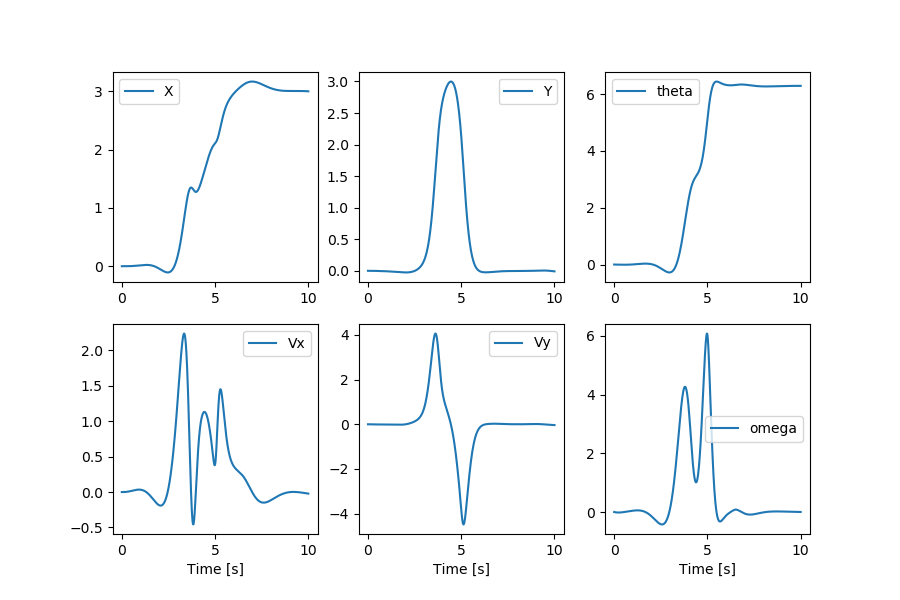

<IPython.core.display.Javascript object>


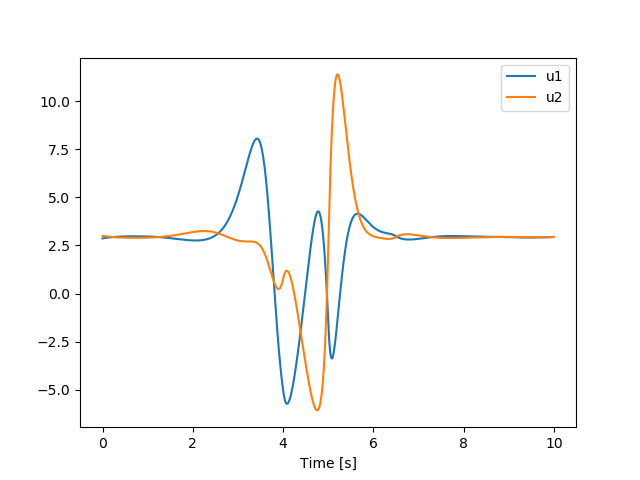

In [41]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, z[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, z[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, z[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, z[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, z[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, z[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')
plt.savefig('4.3.png')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
plt.savefig('4.4.png')